In [1]:
from keras.applications import VGG16
from keras import backend as K

input_shape = (150, 150, 3)
model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [2]:
import numpy as np

def tensor_to_image(T):
    # Adjust mean as 0, standard derivation as 0.1
    T -= T.mean()
    T /= (T.std() + 1e-5)
    T *= 0.1
    # Clip between 0 to 1
    T += 0.5
    T = np.clip(T, 0, 1)
    # Clip between 0 to 255
    T *= 255
    T = np.clip(T, 0, 255).astype('uint8')
    return T

In [3]:
from keras import backend as K

def generate_pattern(model, layer_name, filter_index, input_shape):
    #print('Layer =%s, Filter index=%d' % (layer_name, filter_index))
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # Gradients to maximize the loss.
    grads = K.gradients(loss, variables=model.input)[0]
    # Normalize gradients divide by L2 norm.
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # Make a functor which has input parameter as model input and output as loss and gradients.
    iterate = K.function(inputs=[model.input], outputs=[loss, grads])
    # Convert a input image to the tensor as input_shape.
    # Input sample is a image that entries are random noise.
    input_img = np.random.random(input_shape)*20 + 128.
    layer_input = np.expand_dims(input_img.copy(), axis=0)
    # Repeat gradient ascent method 40 times.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([layer_input])
        layer_input += grads_value * step
    visualized_pattern = layer_input[0]
    return tensor_to_image(visualized_pattern)

In [4]:
import matplotlib.pyplot as plt

layer_name = 'block3_conv1'
filter_index = 0

pattern = generate_pattern(model, layer_name, filter_index, input_shape)

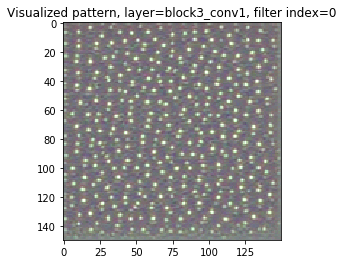

In [5]:
import matplotlib.pyplot as plt

title = 'Visualized pattern, layer=%s, filter index=%d' % (layer_name, filter_index)
plt.figure(title)
plt.title(title)
plt.imshow(pattern)
plt.show()

In [6]:
def generate_pattern_on_layer(model, layer_name, input_shape, margin=5):
    """ Return a 8x8 grid which has visualized 64 filters on layer."""
    size = 64
    num_grids = 8
    num_margins = num_grids-1

    n_channels = input_shape[-1]
    grid = np.zeros((num_grids*size + num_margins*margin, num_grids*size + num_margins*margin, n_channels),
                    dtype='uint8')

    for row in range(num_grids):
        for col in range(num_grids):
            filter_index = row*num_grids + col
            pattern = generate_pattern(model, layer_name, filter_index, input_shape)
            row_first = row * (size+margin)
            row_last = row_first + size
            col_first = col * (size+margin)
            col_last = col_first + size
            grid[row_first:row_last, col_first:col_last] = pattern
    return grid

In [7]:
layer_name = 'block1_conv1'
layer_pattern = generate_pattern_on_layer(model, layer_name, input_shape=(64, 64, 3))

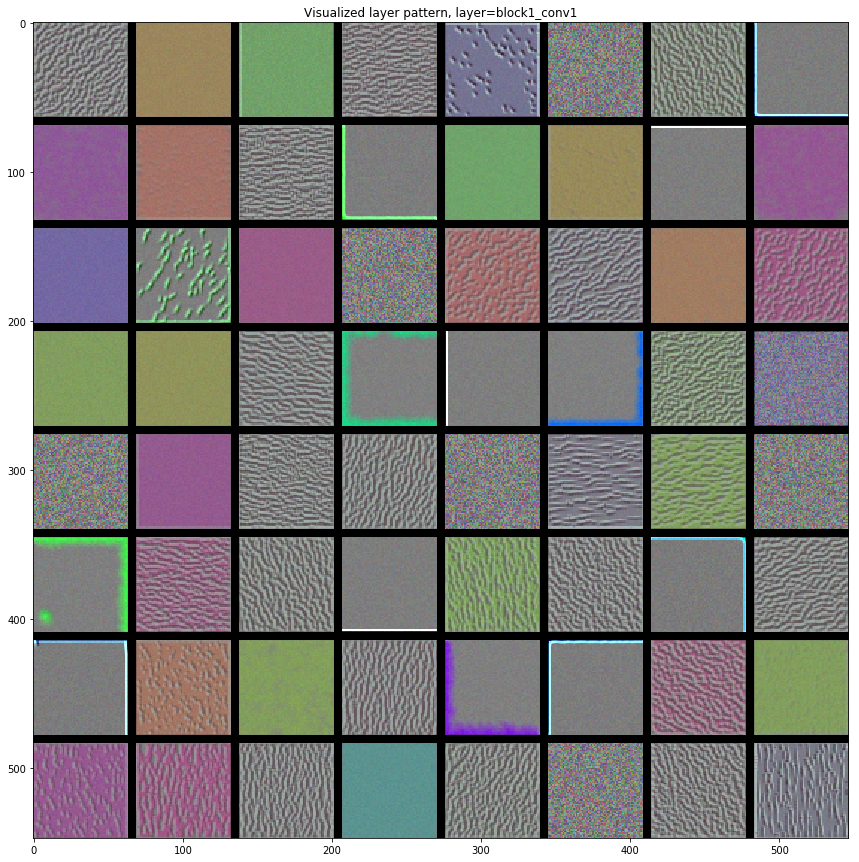

In [8]:
title = 'Visualized layer pattern, layer=%s' % layer_name
plt.figure(title, figsize=(15, 15))
plt.title(title)
plt.imshow(layer_pattern)
plt.show()

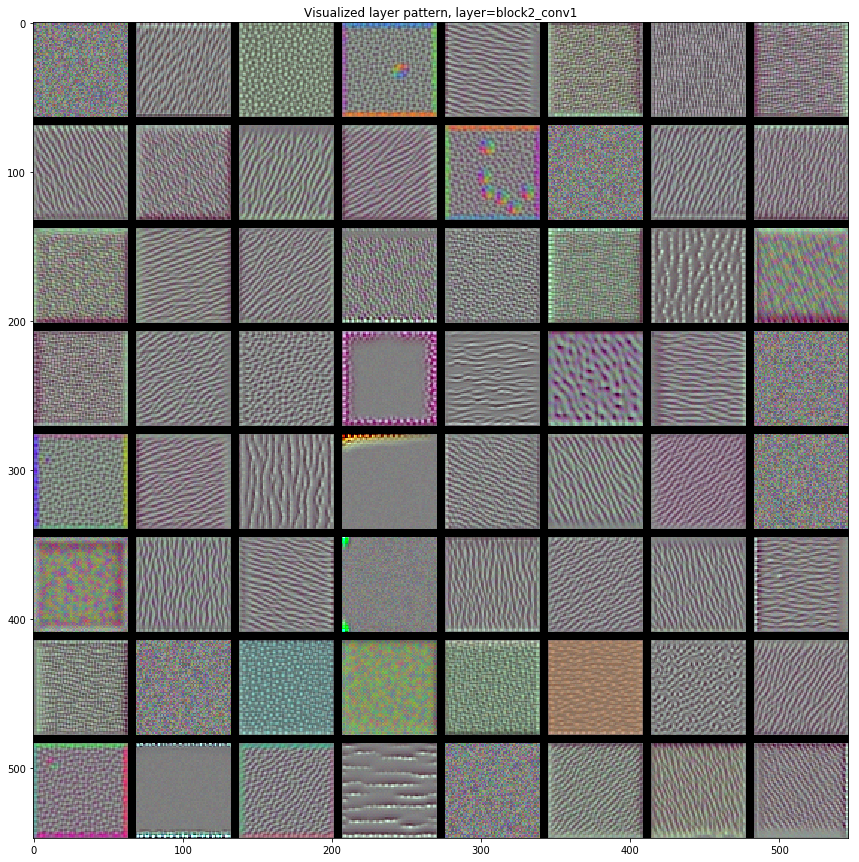

In [9]:
layer_name = 'block2_conv1'
layer_pattern_2 = generate_pattern_on_layer(model, layer_name, input_shape=(64, 64, 3))

title = 'Visualized layer pattern, layer=%s' % layer_name
plt.figure(title, figsize=(15, 15))
plt.title(title)
plt.imshow(layer_pattern_2)
plt.show()

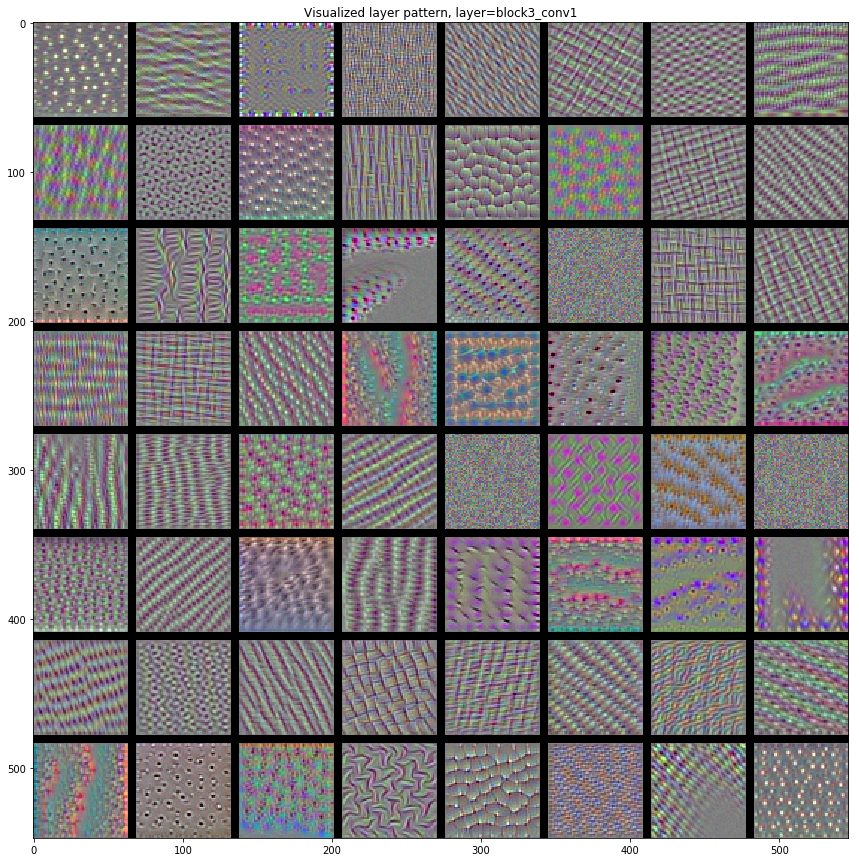

In [10]:
layer_name = 'block3_conv1'
layer_pattern_3 = generate_pattern_on_layer(model, layer_name, input_shape=(64, 64, 3))

title = 'Visualized layer pattern, layer=%s' % layer_name
plt.figure(title, figsize=(15, 15))
plt.title(title)
plt.imshow(layer_pattern_3)
plt.show()

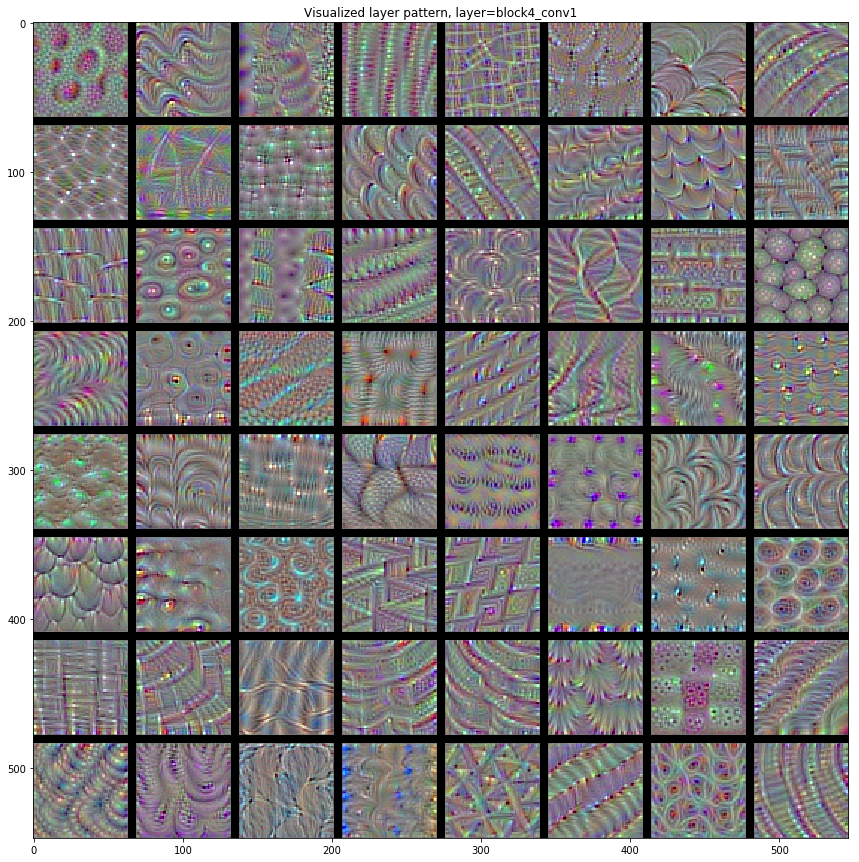

In [11]:
layer_name = 'block4_conv1'
layer_pattern_4 = generate_pattern_on_layer(model, layer_name, input_shape=(64, 64, 3))

title = 'Visualized layer pattern, layer=%s' % layer_name
plt.figure(title, figsize=(15, 15))
plt.title(title)
plt.imshow(layer_pattern_4)
plt.show()